# Caçador de OVNIs

Em que estado e horário é mais "fácil" de avistar um OVNI nos EUA?

### Importando o que importa

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

### Lendo o arquivo com todas as ocorrências

In [8]:
df = pd.read_json('https://raw.githubusercontent.com/joaoariedi/presentations/master/Ovnis%20Hunter/ovnis_hunter/ovins.json')

### Visualizando uma amostra dos dados

In [9]:
df.head()

,link,date,city,state,country,shape,duration,summary,posted,images
0,https://www.nuforc.org/webreports//reports/175...,2023-05-19 01:49:00,Harrisburg East of I5,OR,USA,Light,Approx. 3-4 min.,9 lights in straight line,5/19/23,None
1,https://www.nuforc.org/webreports//reports/175...,2023-05-18 19:40:00,Kippens,NF,Canada,Circle,5 minutes,Looked out window and saw the sun catching on ...,5/19/23,Yes
2,https://www.nuforc.org/webreports//reports/175...,2023-05-18 13:27:00,Hurricane,UT,USA,Cigar,10 minutes,Saw what looked like a long cigar shaped objec...,5/19/23,None
3,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:20:00,Sharpsville,IN,USA,Oval,1 hour,Oval like object over town no brightness,5/19/23,None
4,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:00:00,Tadepalligudem,Andhra Pradesh,India,Cube,5 minutes,We are watching the night sky suddenly there i...,5/19/23,Yes


### Renomeando as colunas

In [10]:
df.columns = ['link', 'data', 'cidade', 'estado', 'pais', 'forma', 'duração', 'relato', 'postado', 'imagens']
df.head()

,link,data,cidade,estado,pais,forma,duração,relato,postado,imagens
0,https://www.nuforc.org/webreports//reports/175...,2023-05-19 01:49:00,Harrisburg East of I5,OR,USA,Light,Approx. 3-4 min.,9 lights in straight line,5/19/23,None
1,https://www.nuforc.org/webreports//reports/175...,2023-05-18 19:40:00,Kippens,NF,Canada,Circle,5 minutes,Looked out window and saw the sun catching on ...,5/19/23,Yes
2,https://www.nuforc.org/webreports//reports/175...,2023-05-18 13:27:00,Hurricane,UT,USA,Cigar,10 minutes,Saw what looked like a long cigar shaped objec...,5/19/23,None
3,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:20:00,Sharpsville,IN,USA,Oval,1 hour,Oval like object over town no brightness,5/19/23,None
4,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:00:00,Tadepalligudem,Andhra Pradesh,India,Cube,5 minutes,We are watching the night sky suddenly there i...,5/19/23,Yes


In [11]:
df.tail()

,link,data,cidade,estado,pais,forma,duração,relato,postado,imagens
143280,https://www.nuforc.org/webreports//reports/154...,2020-04-01 10:00:00,Johnscreek,GA,USA,Circle,10,"Glowing circular disc was spinning clock wise,...",5/15/20,None
143281,https://www.nuforc.org/webreports//reports/154...,2020-04-01 09:45:00,Woodbury,MN,USA,Sphere,1 minutes,I was looking out my window and saw a bright w...,6/25/20,None
143282,https://www.nuforc.org/webreports//reports/155...,2020-04-01 09:28:00,Nairobi (Kenya),None,Kenya,Sphere,15-20 minutes,Shining sphere,6/25/20,None
143283,https://www.nuforc.org/webreports//reports/154...,2020-04-01 04:00:00,Anderson,SC,USA,Light,30+ minutes,2 lights appeared out of nowhere just down and...,6/25/20,None
143284,https://www.nuforc.org/webreports//reports/154...,2020-04-01 03:45:00,Petersham,MA,USA,Fireball,2+ minutes,"Ok, this is NOT an April fools joke. At 3:45 t...",4/9/20,None


### Convertendo uma coluna com datas de <code>string</code> para <code>datetime</code>

In [12]:
df['data'] = pd.to_datetime(df['data'])

In [13]:
df.head()

,link,data,cidade,estado,pais,forma,duração,relato,postado,imagens
0,https://www.nuforc.org/webreports//reports/175...,2023-05-19 01:49:00,Harrisburg East of I5,OR,USA,Light,Approx. 3-4 min.,9 lights in straight line,5/19/23,None
1,https://www.nuforc.org/webreports//reports/175...,2023-05-18 19:40:00,Kippens,NF,Canada,Circle,5 minutes,Looked out window and saw the sun catching on ...,5/19/23,Yes
2,https://www.nuforc.org/webreports//reports/175...,2023-05-18 13:27:00,Hurricane,UT,USA,Cigar,10 minutes,Saw what looked like a long cigar shaped objec...,5/19/23,None
3,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:20:00,Sharpsville,IN,USA,Oval,1 hour,Oval like object over town no brightness,5/19/23,None
4,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:00:00,Tadepalligudem,Andhra Pradesh,India,Cube,5 minutes,We are watching the night sky suddenly there i...,5/19/23,Yes


### Limpando os relatos com dados faltantes

In [14]:
selector = pd.isnull(df['forma'])
df[selector].head()

,link,data,cidade,estado,pais,forma,duração,relato,postado,imagens
185,https://www.nuforc.org/webreports//reports/133...,2017-03-25 01:00:00,Fallbrook,CA,USA,None,1.5 minutes,Green laser lights coming from sky on west sid...,4/7/17,None
188,https://www.nuforc.org/webreports//reports/133...,2017-03-24 23:15:00,Merrimack,NH,USA,None,4 seconds,"On the night of March 24th, 2017, I'm on my wa...",4/13/17,None
385,https://www.nuforc.org/webreports//reports/133...,2017-03-10 20:00:00,Memphis,TN,USA,None,10 seconds,Bright green shooting light.,3/17/17,None
442,https://www.nuforc.org/webreports//reports/132...,2017-03-05 10:00:00,San Fernando,CA,USA,None,1 minute,My son and I were playing catch in the backyar...,3/10/17,None
456,https://www.nuforc.org/webreports//reports/132...,2017-03-04 18:30:00,Monson,ME,USA,None,5 minutes,I didn't see an object but there a low flying ...,3/10/17,None


In [15]:
df_dropped = df.dropna()

In [16]:
df_dropped.head()

,link,data,cidade,estado,pais,forma,duração,relato,postado,imagens
1,https://www.nuforc.org/webreports//reports/175...,2023-05-18 19:40:00,Kippens,NF,Canada,Circle,5 minutes,Looked out window and saw the sun catching on ...,5/19/23,Yes
4,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:00:00,Tadepalligudem,Andhra Pradesh,India,Cube,5 minutes,We are watching the night sky suddenly there i...,5/19/23,Yes
6,https://www.nuforc.org/webreports//reports/175...,2023-05-17 15:30:00,Santa Barbara,CA,USA,Other,2 min 23 sec,"1 Rotation ~ 1 sec, Wobbling. Square but thinn...",5/19/23,Yes
10,https://www.nuforc.org/webreports//reports/175...,2023-05-16 22:30:00,Albany,OR,USA,Circle,5-10 minutes,Pulsing orb of rapidly changing lights.,5/19/23,Yes
12,https://www.nuforc.org/webreports//reports/175...,2023-05-16 19:58:00,Varanasi,Uttar Pradesh,India,Triangle,2 Minutes,"Triangle shape object, black in colour with gr...",5/19/23,Yes


### Agrupando os resultados por estado

In [17]:
ocorrencias_por_estado = df_dropped.groupby('estado')['data'].count()

In [18]:
ocorrencias_por_estado.sort_values(ascending=False, inplace=True)

### Plotando os 10 estados com mais ocorrências

<Axes: xlabel='estado'>

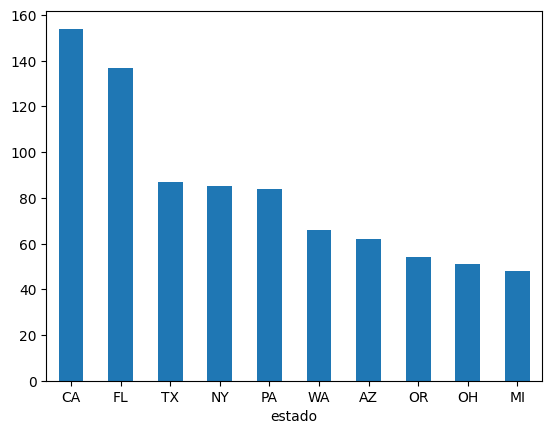

In [19]:
ocorrencias_por_estado.head(10).plot.bar(rot=0)

### Extraindo um <code>subset</code> com somente com os dados da Califórnia

In [20]:
selector = df_dropped['estado'] == "CA"

In [21]:
california = df_dropped[selector]

In [22]:
california.head()

,link,data,cidade,estado,pais,forma,duração,relato,postado,imagens
6,https://www.nuforc.org/webreports//reports/175...,2023-05-17 15:30:00,Santa Barbara,CA,USA,Other,2 min 23 sec,"1 Rotation ~ 1 sec, Wobbling. Square but thinn...",5/19/23,Yes
77,https://www.nuforc.org/webreports//reports/175...,2023-05-08 19:49:00,West hills,CA,USA,Changing,5 minutes,"3 black objects in a vertical line, spinning a...",5/19/23,Yes
117,https://www.nuforc.org/webreports//reports/175...,2023-05-03 17:27:00,San Diego,CA,USA,Rectangle,2-4 minutes,"Saw a distant, rotating, wobbling, dark plank ...",5/19/23,Yes
775,https://www.nuforc.org/webreports//reports/167...,2017-04-12 03:40:00,Rowland Heights,CA,USA,Circle,More than 30 minutes,Red circular object circling the moon at a fas...,4/22/22,Yes
3648,https://www.nuforc.org/webreports//reports/175...,2016-11-20 14:00:00,Sylmar,CA,USA,Unknown,30 seconds to one minute,"Metallic and silent, slowly rotating object pa...",5/19/23,Yes


### Extraindo a hora de cada ocorrência e adicionando em uma nova coluna

In [24]:
california['hora'] = california['data'].dt.hour

### Plotando um <code>histograma</code> para examinar a distribuição de ocorrências

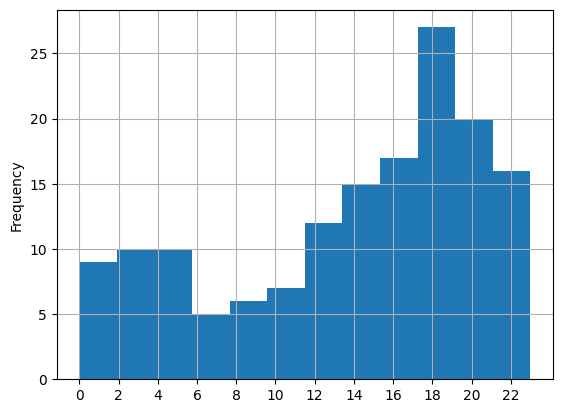

In [25]:
hora_hist = california['hora'].plot.hist(bins=12, grid=True)
plt.xticks(range(california['hora'].min(), california['hora'].max()+1, 2))
plt.show()

# Desafio

### Quais os 5 formatos de OVNI mais comuns nos relatos?

In [ ]:
# CODE

### Qual o horário mais difícil para avistarmos um OVNI em forma de Charuto?

In [48]:
# CODE

# Wordcloud


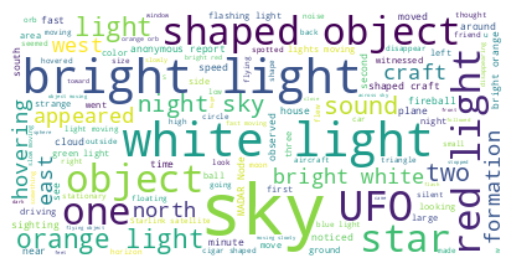

In [49]:
from wordcloud import WordCloud, STOPWORDS

# dropping nill
relatos = df.relato.dropna()

# combining summary
text = " ".join(review for review in relatos)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["saw", "looked", "nuforc", "seen", "disappeared"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()